<a href="https://colab.research.google.com/github/Ganasa18/belajar-tensorflow/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with Tensorflow

A classsification is where you try to classify something as one thing or antoher

A few type of classification problems:

* Binary classification
* Multiclass classification
* Multilabel classification


# Createing data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
# y
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is little hard to understand right now. let's visualize it!

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [6]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

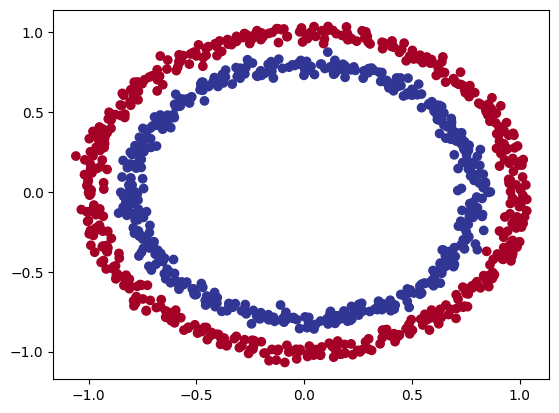

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [8]:
# Check the shapes of our features and labels

X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [10]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the mmodel
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate..


how to evaluate classification model
https://www.ritchieng.com/machine-learning-evaluate-classification-model/

In [11]:
#Import TensorFlow
import tensorflow as tf
tf.__version__

'2.15.0'

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 5.6117 - accuracy: 0.5240
Epoch 2/5
32/32 [==============================] - 0s 8ms/step - loss: 5.8753 - accuracy: 0.5260
Epoch 3/5
32/32 [==============================] - 0s 7ms/step - loss: 5.1683 - accuracy: 0.5360
Epoch 4/5
32/32 [==============================] - 0s 7ms/step - loss: 5.1453 - accuracy: 0.5410
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 5.1245 - accuracy: 0.5410


In [13]:
# Let's try and improve our model by  training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

Since we're working on a binary classification promben and our model is getting arround ~50% accuracy.. it's performing as i So let's step things up a notch and add an extra layer

In [14]:
# Set the random seed
tf.random.set_seed(42)

# Create Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [15]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [16]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling the model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer)

In [17]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layer)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add anther layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [18]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.5060


[0.7003445029258728, 0.5059999823570251]

To visualize our model's predctions, let's cerate a function `plot_decision_boundary()` this function wills

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make perdictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [19]:
import numpy as np

In [20]:
# model_3.predict(X)
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary cerated by a model predicting on X.\
  This function was inspired by two resources:
  1. https://cs231n.github.io/neural-networks-case-study/
  2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 0].max() + 0.1
  # Meshgrid
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


In [21]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 0].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1337117525463374)

In [22]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

313/313 [==============================] - 1s 2ms/step
doing binary classification


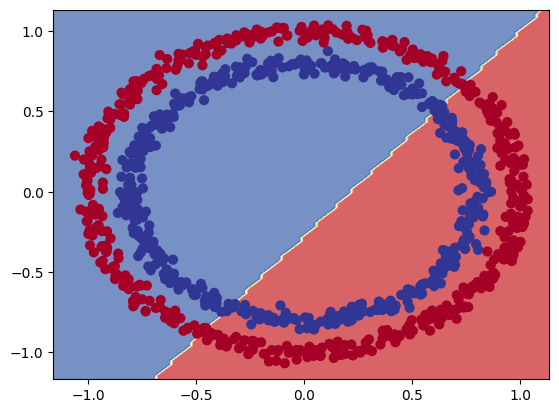

In [23]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [24]:
# Let's see if our model can be used for a regression problem..
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

X_regression, y_regression

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regerssion data
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Ohw wait... we compiled our model for a binary clssification problem.

But... we're noow owkring on a regression problem, ;et's change the model to suit our data.

In [25]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time woth a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 242.5422 - mae: 242.5422
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 116.1300 - mae: 116.1300
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 51.9438 - mae: 51.9438
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 78.6470 - mae: 78.6470
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 59.5153 - mae: 59.5153
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 46.1226 - mae: 46.1226
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 47.3326 - mae: 47.3326
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 42.8357 - mae: 42.8357
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 42.6062 - mae: 42.6062
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 42.9718 - mae: 42.9718
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 7ms/step


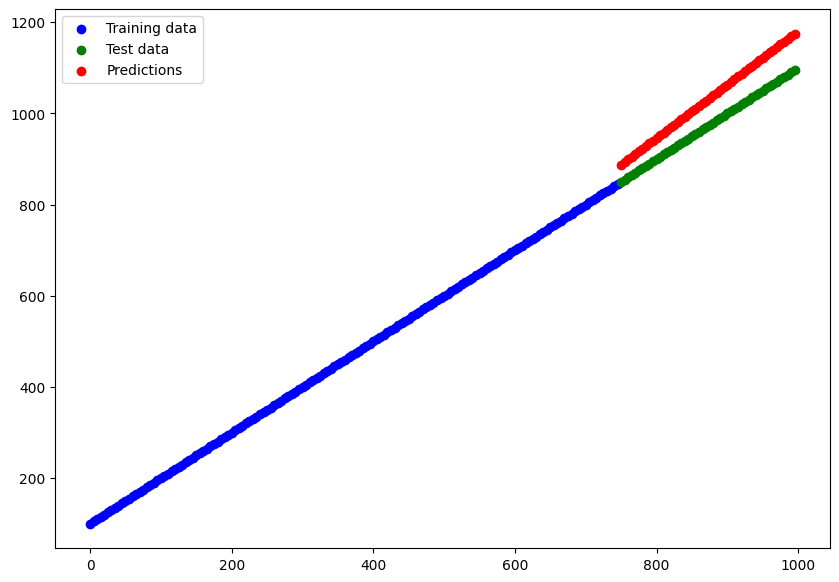

In [26]:
# Make prediciton with our trained model

y_reg_preds = model_3.predict(X_reg_test)
# Plot the model's predection agains our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b",  label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();


In [27]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## The missing piece : Non-linearity

In [28]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fiting the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.2652 - accuracy: 0.4200
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2371 - accuracy: 0.4320
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2304 - accuracy: 0.4390
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2151 - accuracy: 0.4410
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1991 - accuracy: 0.4440
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1921 - accuracy: 0.4420
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1879 - accuracy: 0.4460
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1744 - accuracy: 0.4490
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1595 - accuracy: 0.4530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1321 - accuracy: 0.4580
Epoch 11/

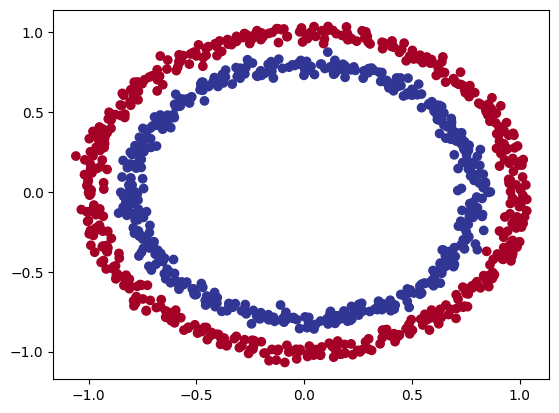

In [29]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing binary classification


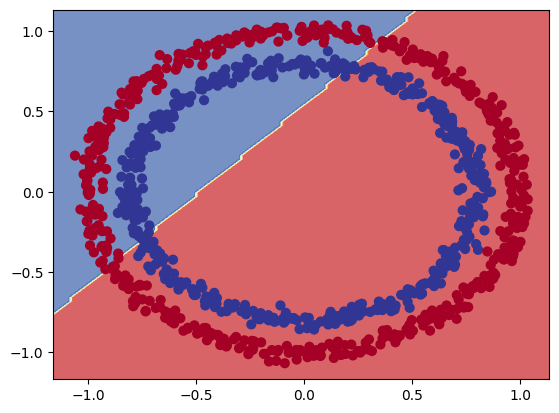

In [30]:
# Check the decision boundary for our latest model
plot_decision_boundary(model_4, X, y)

Let's try build our first neural network with non linear activation function

In [31]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
])

# 2. Compile
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.1741 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1491 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1447 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1077 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0886 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0885 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0884 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0884 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0883 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0882 - accuracy: 0.4850
Epoch 11/

313/313 [==============================] - 1s 3ms/step
doing binary classification


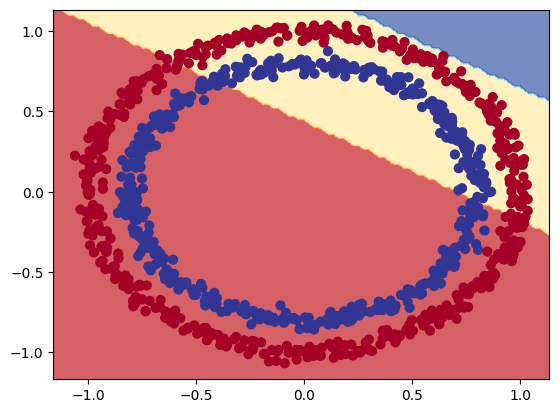

In [32]:
plot_decision_boundary(model_5, X, y)

In [33]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 4.5718 - accuracy: 0.4690
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 4.4037 - accuracy: 0.4780
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 4.1717 - accuracy: 0.4760
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 3.9772 - accuracy: 0.4740
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 3.7644 - accuracy: 0.4770
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 3.5082 - accuracy: 0.4720
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 3.2227 - accuracy: 0.4720
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 2.1505 - accuracy: 0.4800
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9034 - accuracy: 0.4860
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8269 - accuracy: 0.4860
Epoch 11/

In [34]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0643 - accuracy: 0.9780


[0.06427551060914993, 0.9779999852180481]

313/313 [==============================] - 1s 1ms/step
doing binary classification


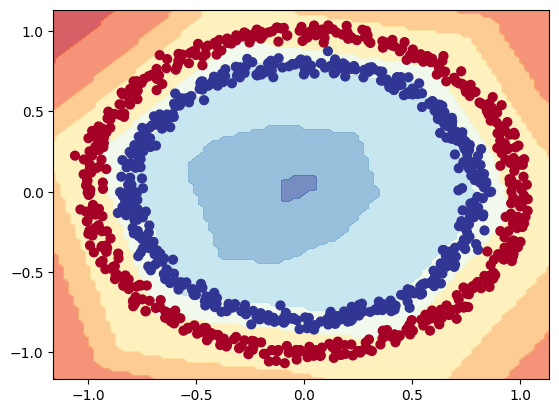

In [35]:
# How do our model prediction look ?
plot_decision_boundary(model_6, X, y)

In [36]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6970 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.4940
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6951 - accuracy: 0.4760
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4870
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.4890
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.4910
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.4720
Epoch 11/

In [37]:
# 4. Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.4762 - accuracy: 0.8340


[0.47623541951179504, 0.8339999914169312]

313/313 [==============================] - 1s 2ms/step
doing binary classification


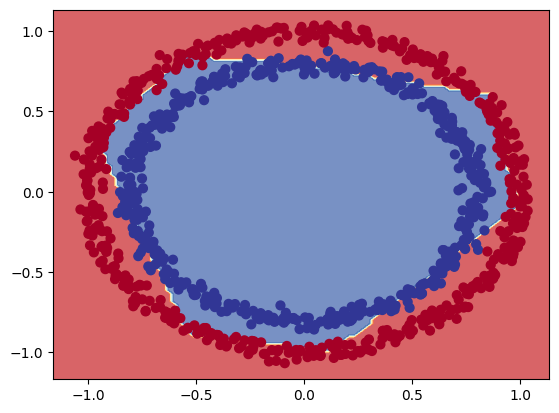

In [38]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

🤔 **Question** What's wrong the predictions we've made ? Are we reallly evaluating our model correctly ? Hint: what data did the model learn on and what data did we predict on ?

🗝️ **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

In [39]:
# Create a toy a tensor (similiar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

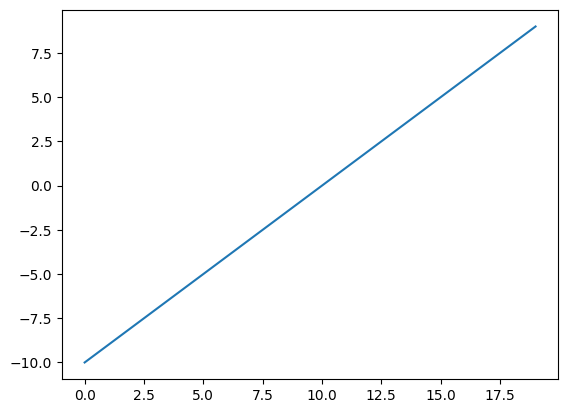

In [40]:
# Visualize our toy tensor
plt.plot(A)

In [41]:
# Let's start by replication sigmoid - sigmoid(x) = 1 / (1 + exp(-x)).
# tf.exponent function
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid funtion on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

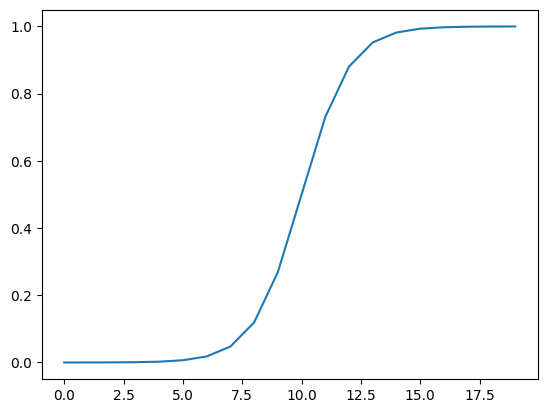

In [42]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [43]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [44]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

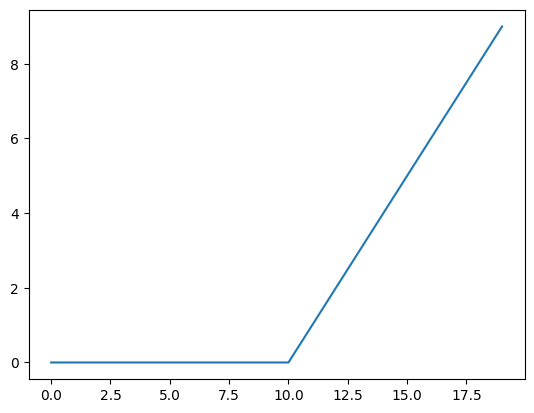

In [45]:
# Plot Relu modifend tensor
plt.plot(relu(A))

In [46]:
# Let's try linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

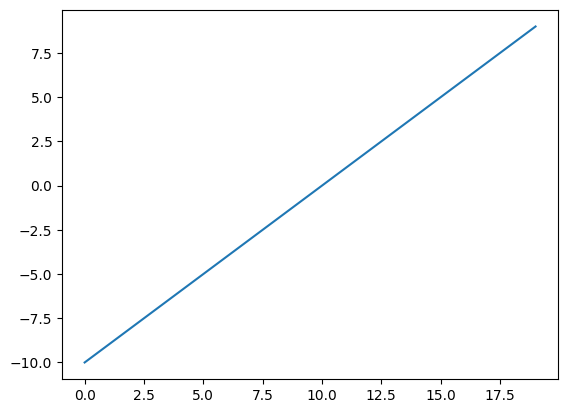

In [47]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [48]:
# Does A even change ?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>



```
# cheat sheet
https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html
```



## Evaluating and improving our classification

In [49]:
# Check how many example we have
len(X)

1000

In [50]:
# Split into train and test sets
X_train , y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [51]:
# Let's recreate a model to fit on the training data and evaluate

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 4ms/step - loss: 0.6898 - accuracy: 0.5387
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.5775
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6814 - accuracy: 0.5663
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.6350
Epoch 5/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6664 - accuracy: 0.5738
Epoch 6/25
25/25 [==============================] - 0s 13ms/step - loss: 0.6534 - accuracy: 0.6062
Epoch 7/25
25/25 [==============================] - 0s 8ms/step - loss: 0.6368 - accuracy: 0.6600
Epoch 8/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6172 - accuracy: 0.7212
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5873 - accuracy: 0.7588
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5449 - accuracy: 0.7725
Epoch 11/25
25/25 

In [52]:
# 4. Evaluate the model
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0950 - accuracy: 0.9850


[0.09495802223682404, 0.9850000143051147]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


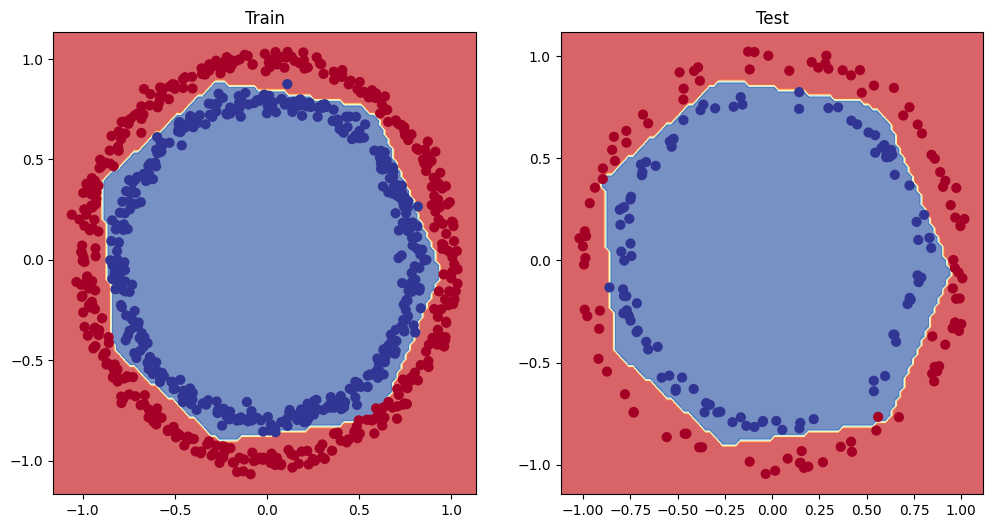

In [53]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # one row, 2 column and first value
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

In [54]:
model_7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 12        
                                                                 
 dense_15 (Dense)            (None, 4)                 20        
                                                                 
 dense_16 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Plot the loss (or training) curves

In [55]:
# history.history
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.689779,0.53875
1,0.686002,0.57750
2,0.681362,0.56625
3,0.674083,0.63500
4,0.666434,0.57375
5,0.653450,0.60625
6,0.636850,0.66000
7,0.617186,0.72125
8,0.587311,0.75875
9,0.544862,0.77250


Text(0.5, 1.0, 'Model_8 loss curves')

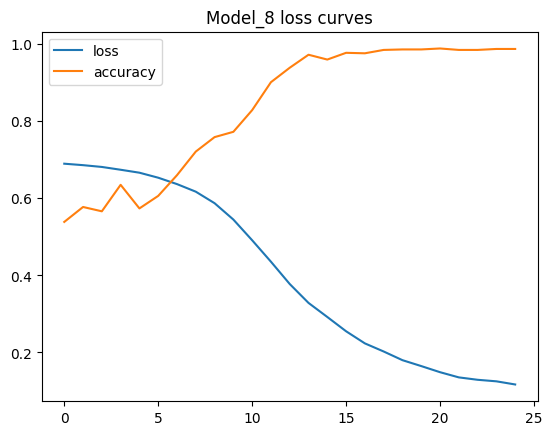

In [56]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

🗝️ **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the moost during training) we're going to use
the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [57]:
#  Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# Crate a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6980 - accuracy: 0.4900 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.4837 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.4875 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.4888 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4850 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4888 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.4837 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.4825 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

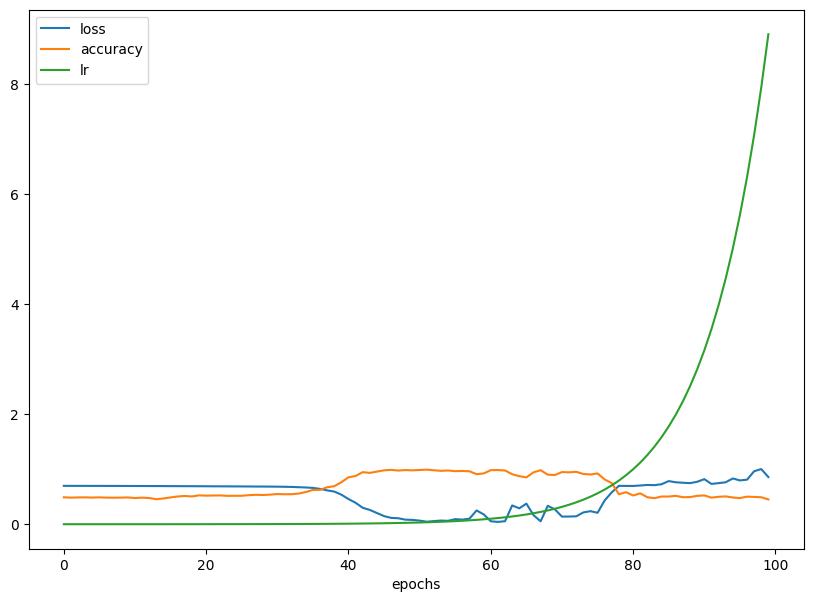

In [58]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

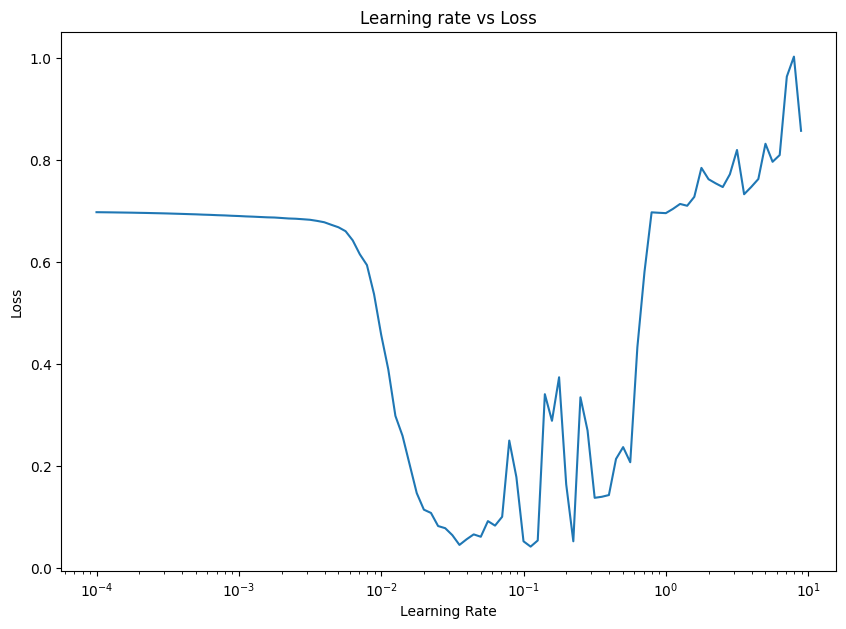

In [59]:
# Plot the learning rate versus loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
# lrs
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [60]:
len(lrs)

100

In [61]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [62]:
# Learning rate we used before (model_8)
10**-1

0.1

In [63]:
# Let's try using a higher *ideal* learning rate with the same model
# Set random seed
tf.random.set_seed(42)
# Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model with the ideal learning reate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])

# 3. Fit the model for 20 epchs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6882 - accuracy: 0.5512
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5813
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.6087
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.6675
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.7138
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.7638
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.7650
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7975
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.8375
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3758 - accuracy: 0.8763
Epoch 11/20
25/25 [

In [64]:
# Evaluate model 10 on the test dataset
# Got lowest lost value than model_8 and get better accuracy than model_8
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.9900


[0.06994030624628067, 0.9900000095367432]

In [65]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0950 - accuracy: 0.9850


[0.09495802223682404, 0.9850000143051147]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


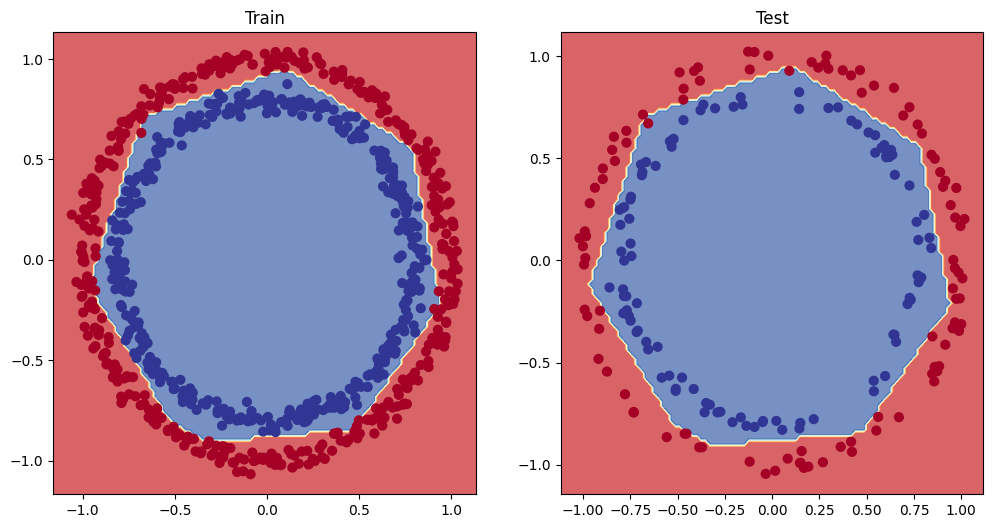

In [66]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show;

## More classification evaluation methods

Alongside visualizing our models reuslt as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [67]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set : {loss}")
print(f"Model accuracy on the test set: {(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.9900
Model loss on the test set : 0.06994030624628067
Model accuracy on the test set: 99.00%


## How about a confusion matrix ?

In [68]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

Ooops.. looks like our predictions array has come out in **prediction probability** form.. the standart output from the sigmoid (or softmax) activation functions.

In [69]:
y_preds[:10], y_test[:10]

(array([[0.9571928 ],
        [0.9571928 ],
        [0.943554  ],
        [0.9571928 ],
        [0.05808445],
        [0.0306318 ],
        [0.9438862 ],
        [0.0021621 ],
        [0.9571928 ],
        [0.01610025]], dtype=float32),
 array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]))

In [70]:
# Convert prediction probabilities to binary format view the first 10
# if greather than 5 to 1 and lower make to 0
tf.round(y_preds)[:10]


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [71]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

How about we prettify our confusion matrix ?

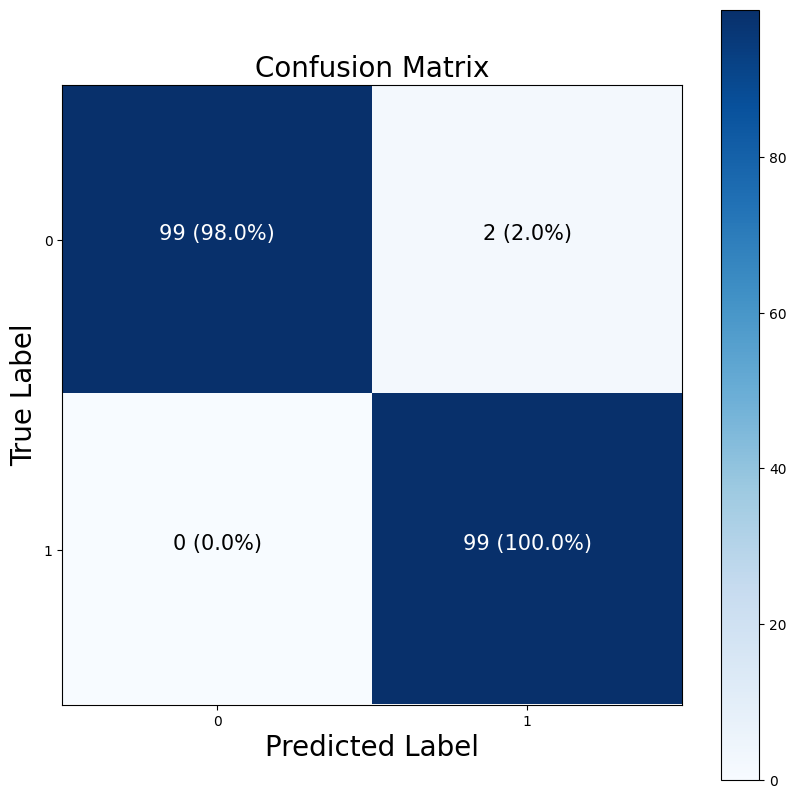

In [79]:
# Note : the confusion matrix code we're about to write is a remix of scikit learn's plot_confusion_matrix
import itertools

figsize = (10, 10)

# Create  the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm =cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label", ylabel="True Label",
       xticks=np.arange(n_classes),yticks=np.arange(n_classes),
       xticklabels=labels, yticklabels=labels)

# Set x-axis labels
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] *100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)


In [76]:
cm.shape[0]

2

In [74]:
cm_norm

array([[0.98019802, 0.01980198],
       [0.        , 1.        ]])

# Working with a larger example (multiclass classification)

When you have more than two calsses as an option, it's known as **multi-class classification**.

* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# Show the first training example
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [4]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

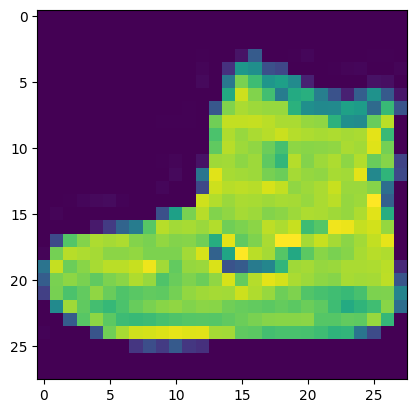

In [9]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [10]:
# Check out samples label
train_labels[0]

9

In [11]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

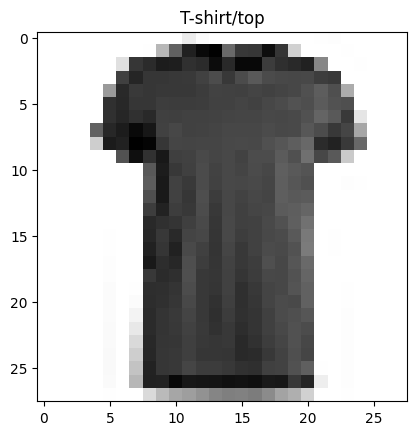

In [12]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

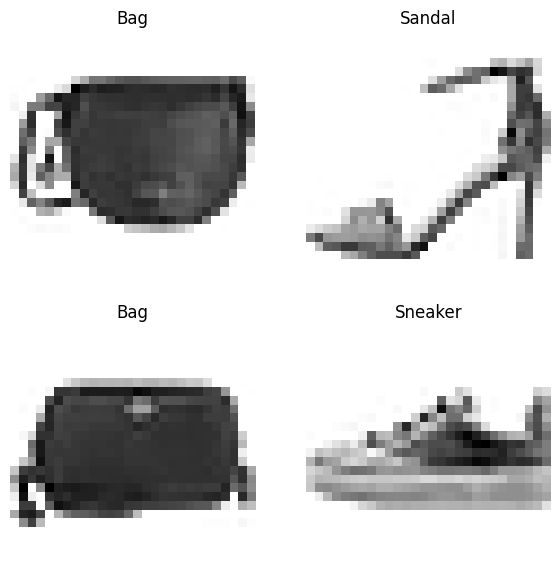

In [14]:
# Plot multiple random images of MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

for our multi-class classification model, we can use similar architecture :

* Input shape = 28 x 28 (the shape of one image)
`ex: train_data[0].shape`

* Output shape = (one per class of clothing)
`ex: len(class_names)`

* Loss function = tf.keras.losses.CategoricalCrosstentropy()
 * If your labels are one-hot encoded, use CategoricalCrossentrophy()
 * If your labels are integer from use SparseCategoricalCrossentrophy()

* Output layer activation = Softmax(not sigmoid)

In [21]:
# our data needs to be flattend (from 28 * 28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape #(784 from 28 * 28)

(None, 784)

In [25]:
train_labels[:10]
tf.one_hot(train_labels[:10], depth=10) # Fix Error Shapes (32, 1) and (32, 10) are incompatible

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [26]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # add this line for incompatible Shapes (32,) and (32, 28, 10) are incompatible

    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax) # has 10 output layers
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
non_norm_history = model_11.fit(train_data,
                            tf.one_hot(train_labels, depth=10),
                            epochs=10,
                            validation_data=(test_data,  tf.one_hot(test_labels, depth=10)))


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2712 - accuracy: 0.1383 - val_loss: 2.0725 - val_accuracy: 0.1796
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8028 - accuracy: 0.2468 - val_loss: 1.6495 - val_accuracy: 0.2869
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6198 - accuracy: 0.2840 - val_loss: 1.5798 - val_accuracy: 0.2920
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5687 - accuracy: 0.3023 - val_loss: 1.5369 - val_accuracy: 0.3220
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5371 - accuracy: 0.3191 - val_loss: 1.5384 - val_accuracy: 0.3260
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5139 - accuracy: 0.3310 - val_loss: 1.4931 - val_accuracy: 0.3362
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4943 - accuracy: 0.3402 - val_loss: 1.4859 - val_accuracy:

In [27]:
# Check the model summary
model_11.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 4)                 3140      
                                                                 
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Check the min and max values of the trainding data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normallized) they like to have the numbers in the tensor between 0 & 1

In [34]:
# We cna get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0 # devided by max val
test_data_norm = test_data / 255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [40]:
# Now our data is normalized, let;s build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1315 - accuracy: 0.5650 - val_loss: 0.7877 - val_accuracy: 0.7120
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7385 - accuracy: 0.7259 - val_loss: 0.7255 - val_accuracy: 0.7325
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6915 - accuracy: 0.7477 - val_loss: 0.6842 - val_accuracy: 0.7614
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6621 - accuracy: 0.7609 - val_loss: 0.6615 - val_accuracy: 0.7663
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6426 - accuracy: 0.7682 - val_loss: 0.6515 - val_accuracy: 0.7644
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6278 - accuracy: 0.7746 - val_loss: 0.6394 - val_accuracy: 0.7712
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6177 - accuracy: 0.7768 - val_loss: 0.6288 - val_accuracy:

🗝️ **Note:** Neural networks tend to prefer data in numercial form as well as scaled/normalized(numbers between 0 & 1)

<Axes: title={'center': 'Normalized data'}>

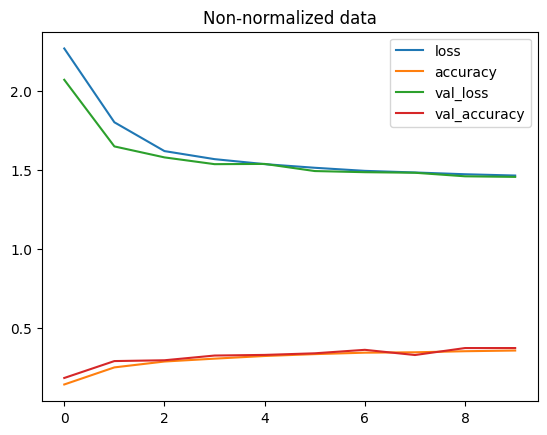

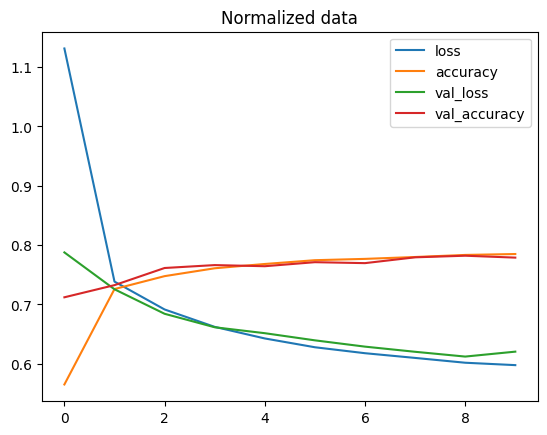

In [41]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

🗝️ **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're compary models, it's importan to make sure you're comparing them on the same criteria (e.g same architecture but different data or same data but different architecture)

## Finding the ideal learning rate

In [42]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model (to the normalized data)
find_lr_history = model_13.fit(train_data_norm,
                            train_labels,
                            epochs=40,
                            validation_data=(test_data_norm, test_labels),
                            callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0150 - accuracy: 0.6348 - val_loss: 0.6884 - val_accuracy: 0.7599 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6266 - accuracy: 0.7827 - val_loss: 0.6254 - val_accuracy: 0.7819 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5774 - accuracy: 0.8004 - val_loss: 0.5931 - val_accuracy: 0.7921 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5505 - accuracy: 0.8090 - val_loss: 0.5686 - val_accuracy: 0.8014 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5356 - accuracy: 0.8147 - val_loss: 0.5598 - val_accuracy: 0.8033 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5235 - accuracy: 0.8197 - val_loss: 0.5799 - val_accuracy: 0.7968 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

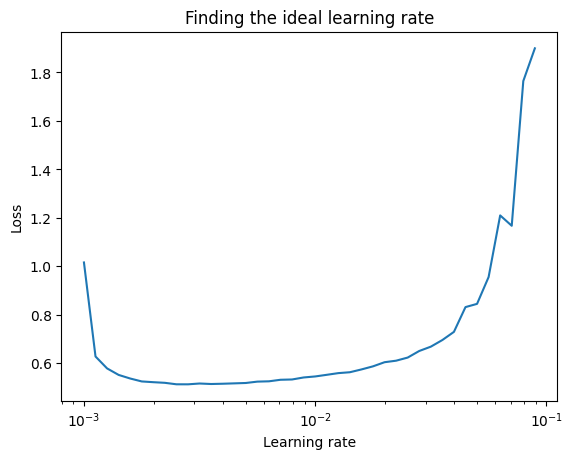

In [43]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [116]:
10**-2.2

0.00630957344480193

In [48]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])



# Fit the model (to the normalized data)
history_14 = model_14.fit(train_data_norm,
                            train_labels,
                            epochs=20,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1662 - accuracy: 0.6050 - val_loss: 0.8505 - val_accuracy: 0.7340
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7513 - accuracy: 0.7544 - val_loss: 0.7132 - val_accuracy: 0.7548
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6639 - accuracy: 0.7675 - val_loss: 0.6621 - val_accuracy: 0.7660
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6283 - accuracy: 0.7762 - val_loss: 0.6404 - val_accuracy: 0.7750
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6087 - accuracy: 0.7826 - val_loss: 0.6469 - val_accuracy: 0.7699
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5931 - accuracy: 0.7896 - val_loss: 0.6235 - val_accuracy: 0.7804
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5842 - accuracy: 0.7938 - val_loss: 0.6102 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class we could :
* Evaluate its performance using other classification matrics (such as a confusion matrix)

* Assess some of its predictions (through visualizations)

* Improve its results (by training it for longer or changing the architecture)

* Save and export it for use in an application

In [49]:
# Create a confusion matrix

# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)


  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [52]:
# Make some prediction with our model
y_probs = model_14.predict(test_data_norm) # probs is hosrt for prediction probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[5.2282676e-09, 2.8028521e-07, 4.1202734e-06, 1.3910220e-09,
        8.2080788e-08, 1.5274011e-01, 2.0781238e-08, 1.7995046e-01,
        8.4469676e-02, 5.8283520e-01],
       [1.1390199e-05, 6.7070087e-06, 9.4492984e-01, 4.9351384e-10,
        4.3527499e-02, 3.8276398e-27, 1.1350853e-02, 5.5888282e-19,
        1.7370473e-04, 2.2612547e-11],
       [2.4698693e-08, 9.9943388e-01, 4.0595132e-04, 2.4259756e-09,
        7.8853202e-07, 3.3533198e-09, 6.5984267e-08, 7.0057358e-05,
        1.8231189e-06, 8.7410088e-05],
       [1.3939216e-07, 9.9906379e-01, 7.3666370e-04, 4.3240025e-08,
        3.8113185e-06, 3.1038415e-08, 3.6799759e-07, 5.7197783e-05,
        6.9226585e-06, 1.3098060e-04],
       [1.5803865e-01, 5.4033338e-03, 1.7528822e-01, 6.6182546e-02,
        1.0410350e-01, 3.3649242e-10, 4.8341680e-01, 1.1640791e-09,
        7.5661810e-03, 7.0140720e-07]], dtype=float32)

🗝️ **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g if your model was trained on normalized data, you'll want to make prediction on normalized data)

In [55]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [57]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([5.2282676e-09, 2.8028521e-07, 4.1202734e-06, 1.3910220e-09,
        8.2080788e-08, 1.5274011e-01, 2.0781238e-08, 1.7995046e-01,
        8.4469676e-02, 5.8283520e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [58]:
# Convert all of the prediction probabilites into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[750,   6,  32,  86,   6,   0,  99,   0,  21,   0],
       [ 18, 925,  10,  35,   4,   0,   4,   2,   2,   0],
       [ 27,   1, 704,  19, 167,   0,  59,   0,  23,   0],
       [ 31,  20,  11, 856,  35,   1,  34,   0,  12,   0],
       [  2,   0, 133,  47, 735,   0,  66,   0,  17,   0],
       [  1,   1,   0,   0,   0, 911,   0,  56,  13,  18],
       [146,   1, 176,  83, 163,   3, 401,   0,  27,   0],
       [  0,   0,   0,   0,   0,  41,   0, 924,   1,  34],
       [  4,   1,  23,  15,  10,   5,   4,   5, 930,   3],
       [  0,   1,   1,   0,   0,  18,   0,  53,   4, 923]])

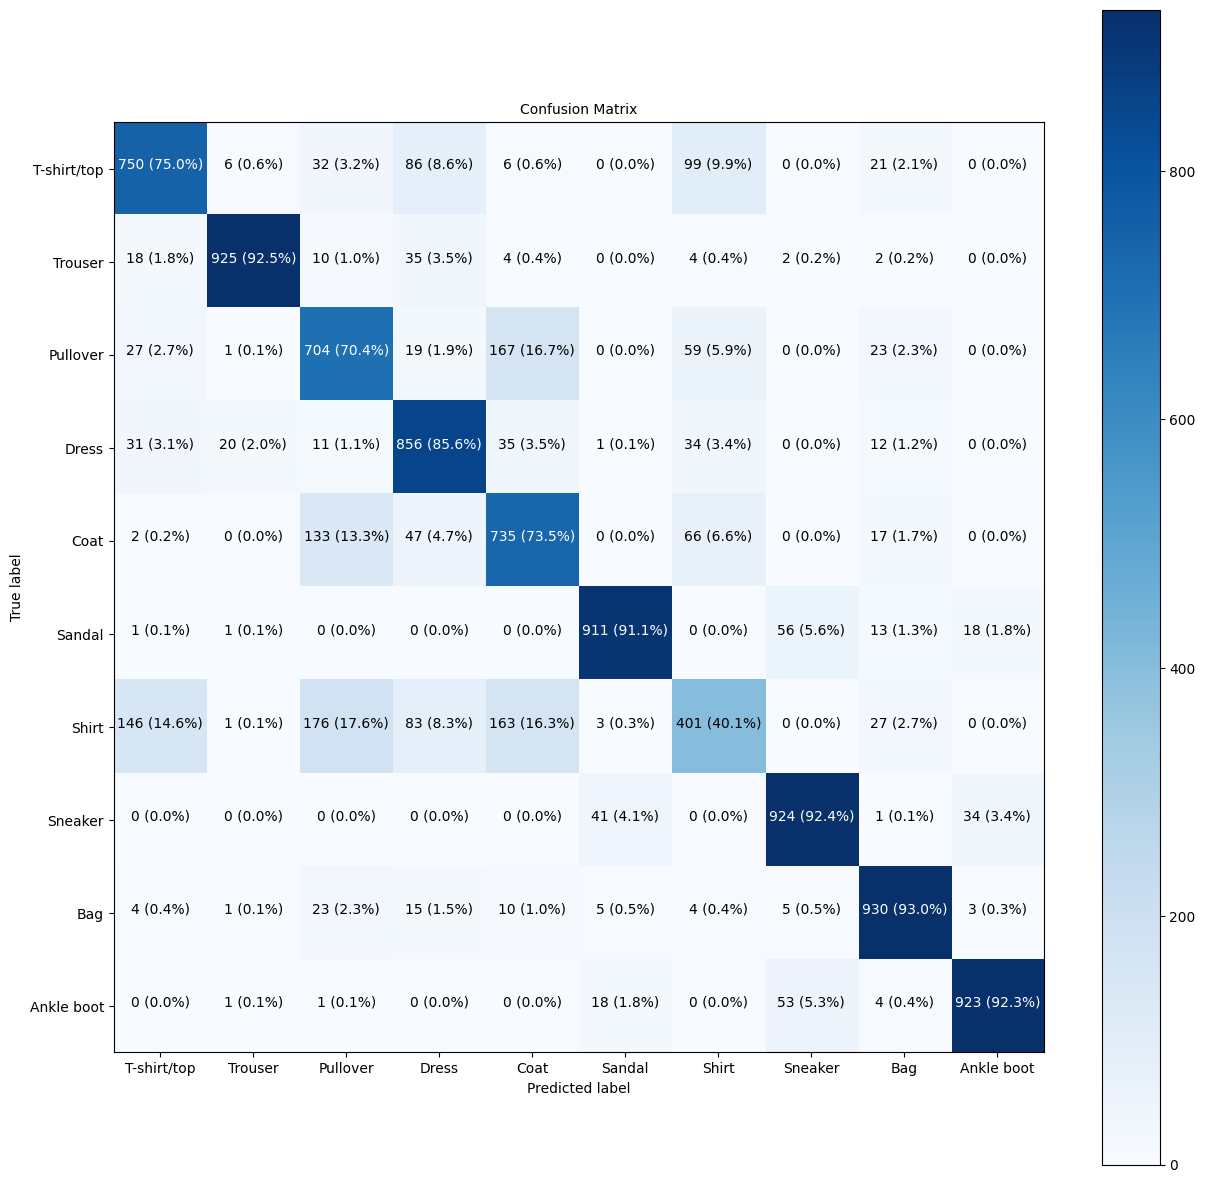

In [60]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

🗝️**Note:** Often when working with images and other forms of visual data, its's  a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random iamge
* Makke a prediction on said image
* Label the plot with the truth label & the predicted label

In [62]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 33ms/step


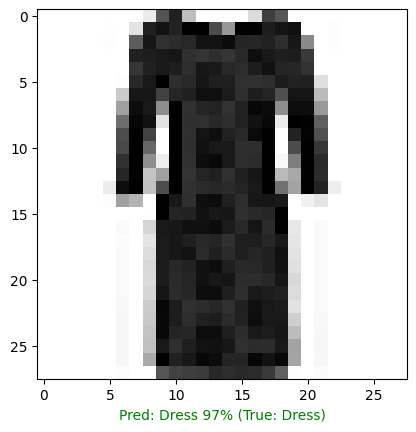

In [71]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm, #allways make prediction on the same kind of data your model was trained
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning ?

In [72]:
# Find the layers of our most recent model
model_14.layers

In [73]:
# Extract a particular layer
model_14.layers[1]

In [74]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape # mean every matrix has 4 number of 784

(array([[-0.04924392,  0.22997923, -0.75037026, -0.08064842],
        [ 0.6385392 ,  0.6564321 , -0.41703662, -0.5524861 ],
        [ 0.35835037,  1.4434153 , -1.3270284 , -0.71117955],
        ...,
        [-0.46974453, -0.03824745,  0.66933095, -0.13717632],
        [ 0.25933895,  0.21733592, -0.08894519,  0.18717726],
        [ 0.16812718,  0.28571168, -0.3296347 ,  0.565389  ]],
       dtype=float32),
 (784, 4))

In [75]:
28 * 28

784

In [76]:
model_14.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 4)                 3140      
                                                                 
 dense_40 (Dense)            (None, 4)                 20        
                                                                 
 dense_41 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now let's check out the bias vector

In [78]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([-1.2881773 ,  0.91417986,  1.7948202 ,  1.3499436 ], dtype=float32),
 (4,))

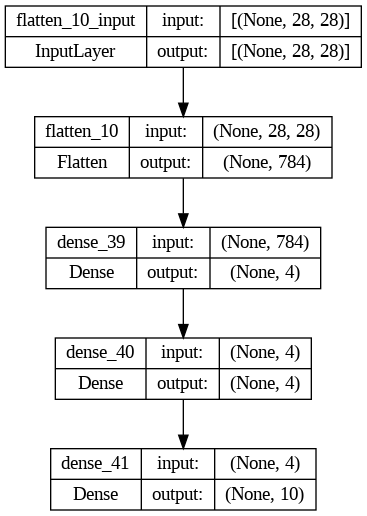

In [77]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

In [79]:
# Importing the stuffs we need
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy

In [80]:
# Importing the make moons from sklearn datasets
from sklearn.datasets import make_moons

# Make 3k samples
n_samples = 1000

# Create circles
X , y = make_moons(n_samples = n_samples ,
                   random_state = 42)

# Checking the shape of X and y
print(X.shape , y.shape)

# Packing them into a dataframe
make_moons_df = pd.DataFrame({'col_1': X[: , 0] ,
                              'col_2': X[: , 1],
                              'label': y})
make_moons_df.head()

(1000, 2) (1000,)


,col_1,col_2,label
0,0.008727,0.368174,1
1,0.921384,-0.496905,1
2,0.940226,-0.498212,1
3,0.465875,-0.345406,1
4,-0.850412,0.526117,0


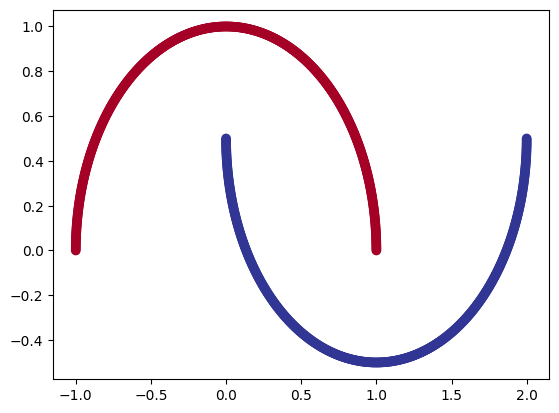

In [81]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [82]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y ,
                                                       test_size = 0.2 ,
                                                       random_state = 42)

# Checking the shape after splitting
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [102]:
# Getting the MNIST data from the keras dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

# Splitting into train and test
(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

# Number of classes and class names
num_classes = 10     # 10 labels/classes

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Checking the shapes of the splits
train_images.shape , train_labels.shape , test_images.shape , test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [159]:
# Create Model 15

model_15 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_15.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])



# Fit the model (to the normalized data)
history_15 = model_15.fit(train_images,
                            train_labels,
                            epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7270 - accuracy: 0.6902
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6792 - accuracy: 0.7518
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6434 - accuracy: 0.7676
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6094 - accuracy: 0.7829
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5862 - accuracy: 0.7905
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5543 - accuracy: 0.8035
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5276 - accuracy: 0.8128
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5123 - accuracy: 0.8181
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4949 - accuracy: 0.8274
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.479

In [160]:
# Making predictions
pred_probs  = model_15.predict(test_images)

# Converting our pred probs to predictions
preds = pred_probs.argmax(axis = 1)

# Viewing the first 10 preds
preds[:10]

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [161]:
# Check Detail Loss & Accuracy
loss, accuracy = model_15.evaluate(train_images, train_labels)
print(f"Model loss on the test set : {loss}")
print(f"Model accuracy on the test set: {(accuracy * 100):.2f}%")

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3762 - accuracy: 0.8672
Model loss on the test set : 0.37622883915901184
Model accuracy on the test set: 86.72%


In [162]:

# Making predictions
preds = model_15.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [131]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



def plot_prediction_images():
  num_rows = 5
  num_cols = 3
  num_images = num_rows * num_cols
  plt.figure(figsize = (2*2*num_cols , 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows , 2*num_cols , 2*i+1)
    plot_image(i , preds[i], test_labels , test_images)
    plt.subplot(num_rows , 2*num_cols , 2*i+2)
    plot_value_array(i , preds[i] ,  test_labels)
  plt.tight_layout()
  plt.show

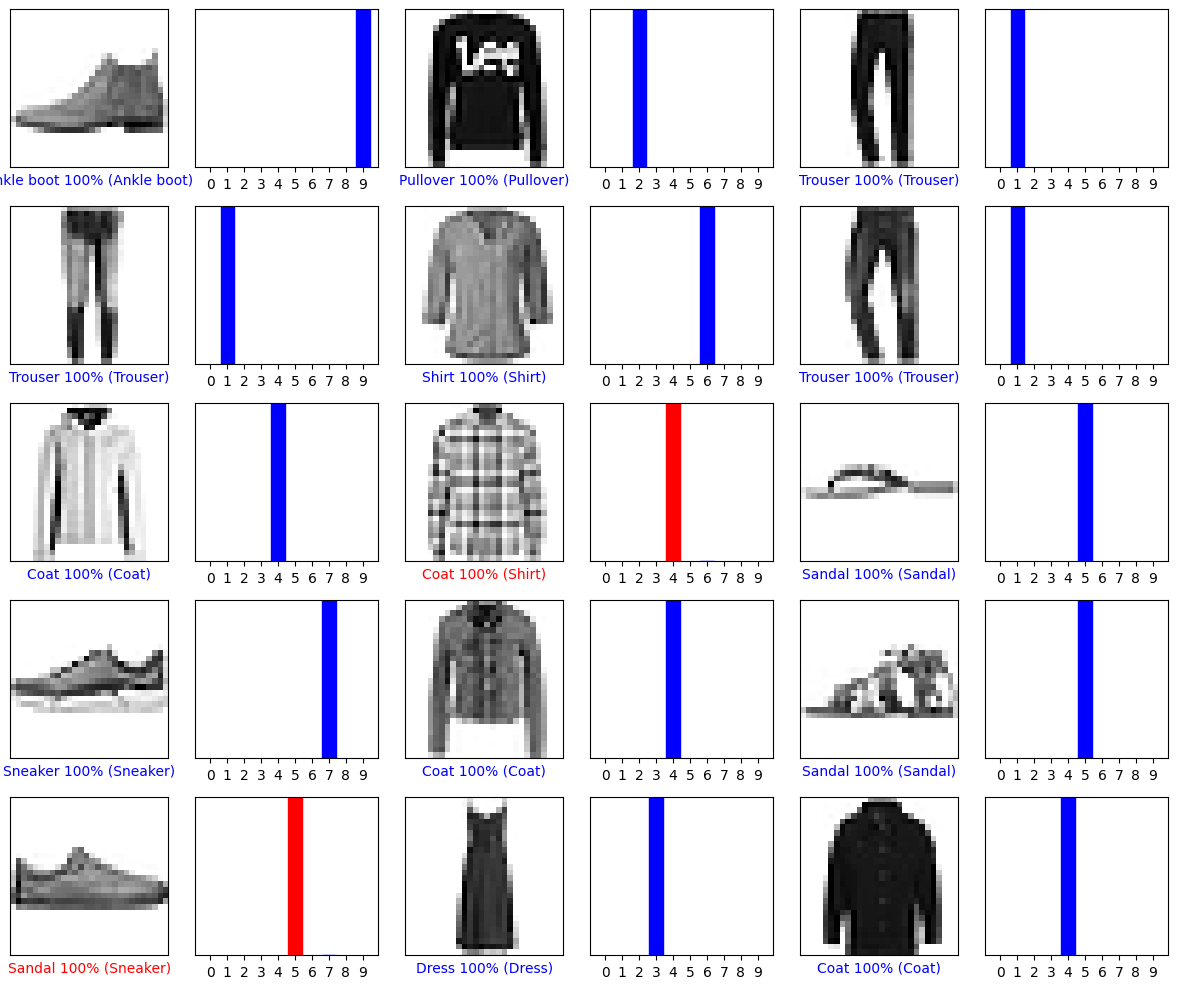

In [163]:
# Using our function
plot_prediction_images()

In [119]:
# We cna get our training and testing data between 0 & 1 by dividing by the maximum
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

# check the min and max values of the scaled training data
train_images_norm.min(), train_images_norm.max()

(0.0, 1.0)

In [153]:
# Create Model 16

model_16 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(40, activation="relu"),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_16.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])



# Fit the model (to the normalized data)
history_16 = model_16.fit(train_images_norm,
                            train_labels,
                            epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5893 - accuracy: 0.7929
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4099 - accuracy: 0.8523
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3697 - accuracy: 0.8651
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3449 - accuracy: 0.8748
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3296 - accuracy: 0.8791
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3164 - accuracy: 0.8839
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3061 - accuracy: 0.8878
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2957 - accuracy: 0.8899
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2891 - accuracy: 0.8934
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.281

In [155]:
# Making predictions
pred_probs  = model_16.predict(test_images_norm)

# Converting our pred probs to predictions
preds = pred_probs.argmax(axis = 1)

# Viewing the first 10 preds
preds[:10]

313/313 [==============================] - 1s 3ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [156]:
# Check Detail Loss & Accuracy
loss_norm, accuracy_norm = model_16.evaluate(train_images_norm, train_labels)
print(f"Model loss on the test set : {loss_norm}")
print(f"Model accuracy on the test set: {(accuracy_norm * 100):.2f}%")

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2302 - accuracy: 0.9132
Model loss on the test set : 0.2301931083202362
Model accuracy on the test set: 91.32%


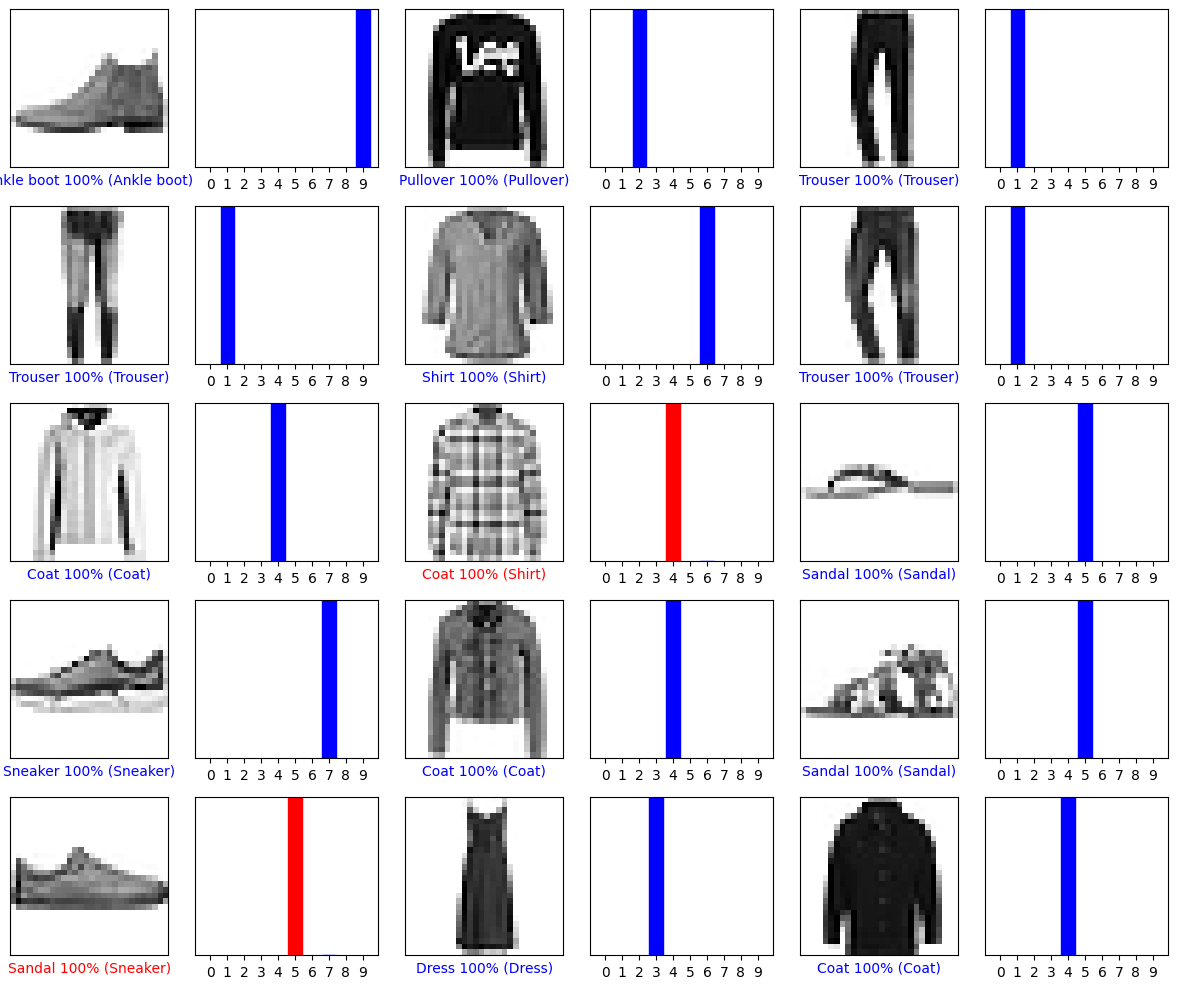

In [157]:
# Using our function
plot_prediction_images()